<a href="https://colab.research.google.com/github/sanglthe140466/DemoGIT/blob/master/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install librosa
!pip install ffmpeg-python
!pip install noisereduce
!apt -qq install -y sox

  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7610 sha256=8b3278ae862b34a35079d865f3898f62b5728cf08217bc44108d6e199a242df4
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 11 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrn

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import ffmpeg
import scipy
import io
import librosa
import IPython
import math
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import noisereduce as nr

/usr/local/lib/python3.6/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# create folder to save file audio
!mkdir /content/drive/'My Drive'/'Audio Folder'

mkdir: cannot create directory ‘/content/drive/My Drive/Audio Folder’: File exists


In [ ]:
# create path name
path_name = '/content/drive/My Drive/Audio Folder/'

In [ ]:
'''------------------------------------
RECORD AUDIO:    
------------------------------------'''
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [3]:
'''------------------------------------
RECORDING:
------------------------------------'''
audio, sr = get_audio()

NameError: ignored

In [ ]:
'''------------------------------------
SAVE FILE AUDIO:
------------------------------------'''
scipy.io.wavfile.write(path_name + 'audio.wav', sr, audio)

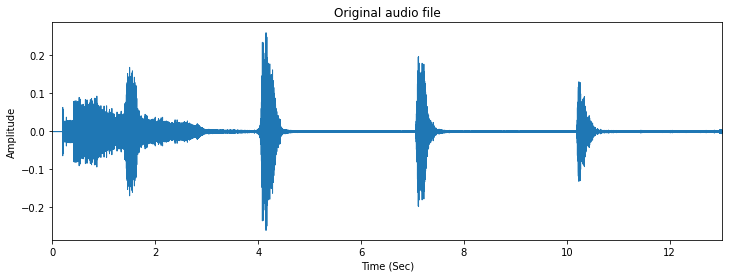

In [ ]:
audio, sr = librosa.load(path_name + 'audio.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio, sr=sr)
plt.title('Original audio file')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

ipd.Audio(audio, rate=sr)

In [ ]:
'''------------------------------------
NOISE REDUCTION:
------------------------------------'''
# Load audio file
audio, sr = librosa.load(path_name + 'audio.wav')
# Noise reduction
noisy_part = audio[0:25000]  
reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=noisy_part, verbose=False)

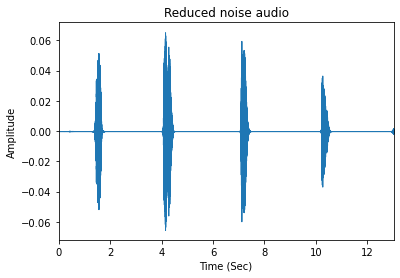

In [ ]:
librosa.display.waveplot(reduced_noise, sr=sr)
plt.title('Reduced noise audio')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()
ipd.Audio(reduced_noise, rate=sr)


In [ ]:
'''------------------------------------
OUTPUT GENERATOR:
    receives a destination path, file name, audio matrix, and sample rate,
    generates a wav file based on input
------------------------------------'''
def output_file(destination ,filename, y, sr, ext=""):
    destination = destination + filename[:-4] + ext + '.wav'
    librosa.output.write_wav(destination, y, sr)

# generating output file [1] 
output_file(path_name , 'audio.wav', reduced_noise, sr, '_reduced_noise')
 

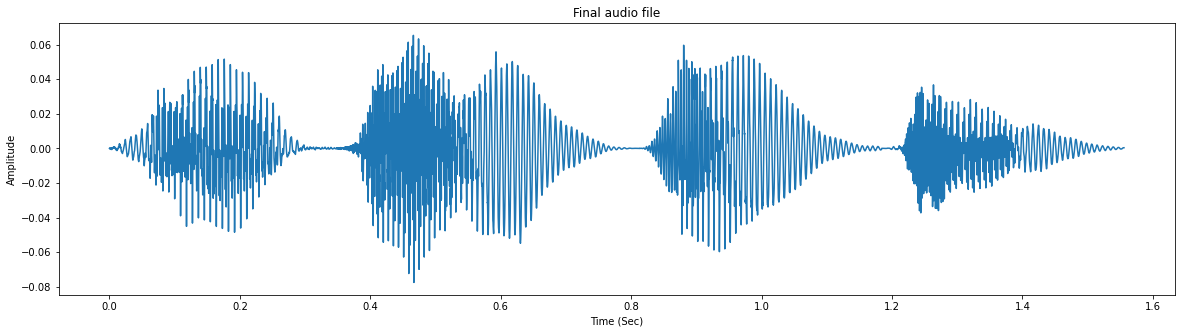

In [ ]:
'''------------------------------------
PROCESS AUDIO:
------------------------------------'''
sample_rate, signal = scipy.io.wavfile.read(path_name + 'audio_reduced_noise.wav')
x, sr = librosa.load(path_name + 'audio_reduced_noise.wav')
y = librosa.effects.split(x, top_db= 30)
l = []

for i in y:
    l.append( x[i[0]:i[1]] )    
x = np.concatenate(l,axis=0)

Time=np.linspace(0, len(x)/sample_rate, num=len(x))

plt.figure(figsize=(20,5))
plt.plot(Time,x)
plt.title('Final audio file')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()
ipd.Audio(x, rate=sr)

In [ ]:
'''------------------------------------
SAVE FINAL AUDIO:
------------------------------------'''
scipy.io.wavfile.write(path_name + 'final_audio.wav', sr, x)